# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503227 Eh
E = -0.8488991062024303 Eh
E = -1.0882281844069175 Eh
E = -1.1369289594005694 Eh
E = -1.1229570527982327 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154682491653282 Eh
E = -0.9873929962932158 Eh
E = -0.9670259116093081 Eh
E = -0.9534242125062946 Eh
E = -0.9449089870950513 Eh
E = -0.9398197912188275 Eh
E = -0.9368706035283358 Eh
E = -0.9351960308386078 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411336572 Eh
E = -0.8397057843499892 Eh
E = -1.0748879317191187 Eh
E = -1.1175258568986868 Eh
E = -1.0951595815644861 Eh
E = -1.0495617842752063 Eh
E = -0.9960202460350621 Eh
E = -0.9415475409906798 Eh
E = -0.8899750208893151 Eh
E = -0.8432718025417757 Eh
E = -0.8022428650141392 Eh
E = -0.7669825247360009 Eh
E = -0.737154544898827 Eh
E = -0.7121961606082455 Eh
E = -0.6914700512624807 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436212 Eh
E = -0.8488985094851157 Eh
E = -1.088231017430786 Eh
E = -1.1369333351418645 Eh
E = -1.1229593878059765 Eh
E = -1.0887606905920533 Eh
E = -1.0504260893271258 Eh
E = -1.015441636439638 Eh
E = -0.9873692257052733 Eh
E = -0.9670168314563375 Eh
E = -0.9534301294889965 Eh
E = -0.9449225613845078 Eh
E = -0.9398332746700113 Eh
E = -0.9368793989542739 Eh
E = -0.9351989265367047 Eh


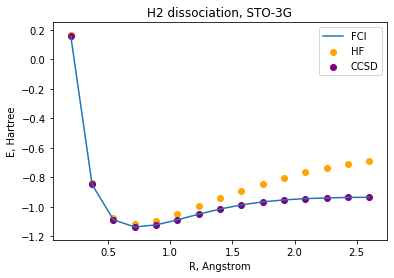

In [6]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [7]:
bond_lengths = np.linspace(0.5,2.7,15)

In [8]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998408 Eh
E = -74.47523205267994 Eh
E = -74.90413378058085 Eh
E = -75.01383133956638 Eh
E = -75.00356512166869 Eh
E = -74.95170869126753 Eh
E = -74.8921864821597 Eh
E = -74.83923063661472 Eh
E = -74.79866365936665 Eh
E = -74.77161515186873 Eh
E = -74.75568947216955 Eh
E = -74.74704715250577 Eh
E = -74.74248898749504 Eh
E = -74.74007426355803 Eh
Could not converge


In [9]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.1294816132027 Eh
E = -74.45343797012882 Eh
E = -74.87055361048274 Eh
E = -74.96308510923824 Eh
E = -74.92817508739554 Eh
E = -74.84281942863745 Eh
E = -74.74051950148719 Eh
E = -74.63577758413565 Eh
E = -74.5357663865733 Eh
E = -74.4449438474384 Eh
E = -74.36975504261737 Eh
E = -74.29778481417816 Eh
E = -74.24167220051008 Eh
E = -74.27129957697417 Eh
Could not converge


In [10]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.1427636391869 Eh
E = -74.47519485717146 Eh
E = -74.90406353010555 Eh
E = -75.01370018934803 Eh
E = -75.00330155818891 Eh
E = -74.95116757042632 Eh
E = -74.89128367467832 Eh
E = -74.8385340113911 Eh
E = -74.80070162375995 Eh
E = -74.78105738717322 Eh
E = -74.74394274756116 Eh
E = -74.77972801511778 Eh
E = -74.78338963453125 Eh
E = -74.64224434263167 Eh
Could not converge


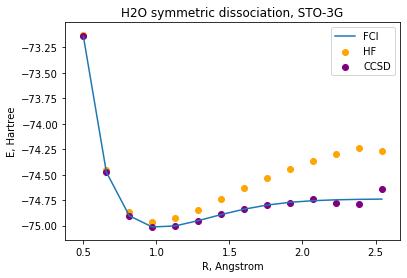

In [15]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()